In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# persiapan dataset

In [7]:
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace=True)

In [8]:
X = df.drop(['CustomerID','Gender'], axis=1)

In [9]:
print(X)

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# menentukan jumlah cluster dengan elbow

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

Text(5, 150000, 'Possible elbow point')

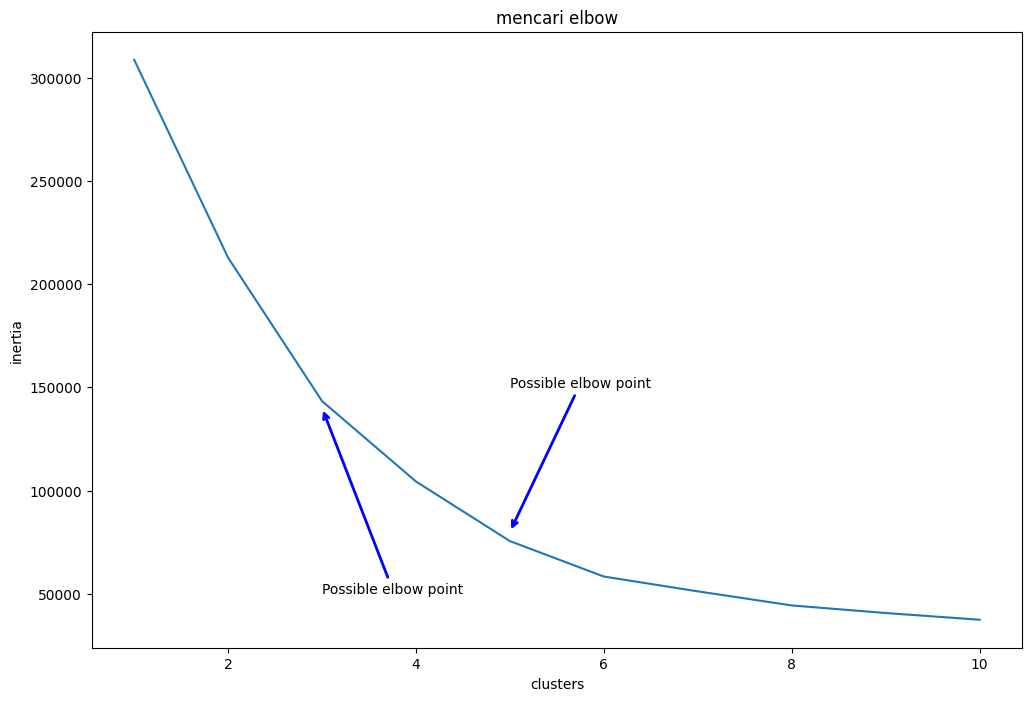

In [14]:
clusters=[]
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

#panah elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

# cluster maksimal data customer segmentation adalah 3 sampai dengan 5, optimal 4 cluster.

# proses clustering 

In [15]:
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels']=kmean.labels_

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Income', ylabel='Score'>

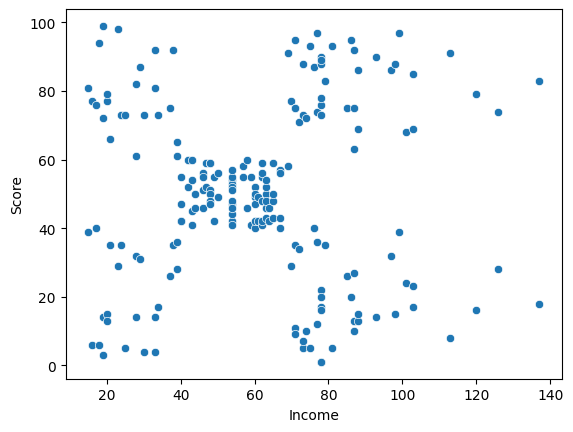

In [21]:
# starting with making the  scatter plot for our parameters
sns.scatterplot(df,x='Income',y='Score')

In [26]:
clustering1= KMeans(n_clusters=4)

In [27]:
clustering1.fit(df[['Income']])

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [28]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [29]:
df['income cluster']=clustering1.labels_
df.head()

,CustomerID,Gender,Age,Income,Score,income cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [30]:
df['income cluster'].value_counts()

income cluster
3    68
0    62
1    50
2    20
Name: count, dtype: int64

In [31]:
clustering1.inertia_

13278.112713472483

In [32]:
inertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Income']])
    inertia_scores.append(kmeans.inertia_)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

In [33]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3949.275613275612,
 2857.441697191697,
 2190.0972210795735,
 1743.4772727272739]

<function matplotlib.pyplot.show(close=None, block=None)>

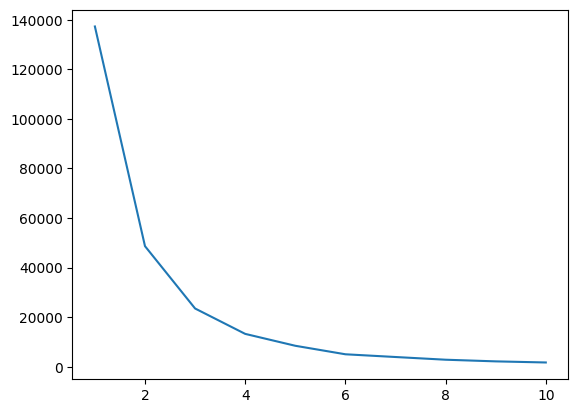

In [34]:
plt.plot(range(1,11),inertia_scores)
plt.show

In [35]:
df.groupby('income cluster')[['Age', 'Score', 'Income']].mean()


,Age,Score,Income
income cluster,,,
0,36.838710,50.403226,77.806452
1,35.280000,49.480000,27.400000
2,36.600000,52.000000,109.700000
3,43.970588,50.014706,54.764706


In [46]:
clustering2=KMeans(n_clusters=4)
clustering2.fit(df[['Income','Score']])

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [47]:
clustering2.labels_
df['Score & Income']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Income,Score,income cluster,Score & Income
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,2


In [38]:
clustering2.inertia_

44448.4554479337

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

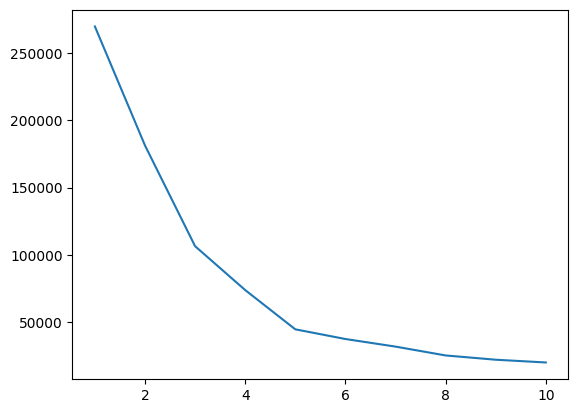

In [48]:
inertia_scores2=[]
for  i in  range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Income','Score']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [49]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,48.260000,56.480000
1,86.538462,82.128205
2,26.304348,20.913043
3,87.000000,18.631579


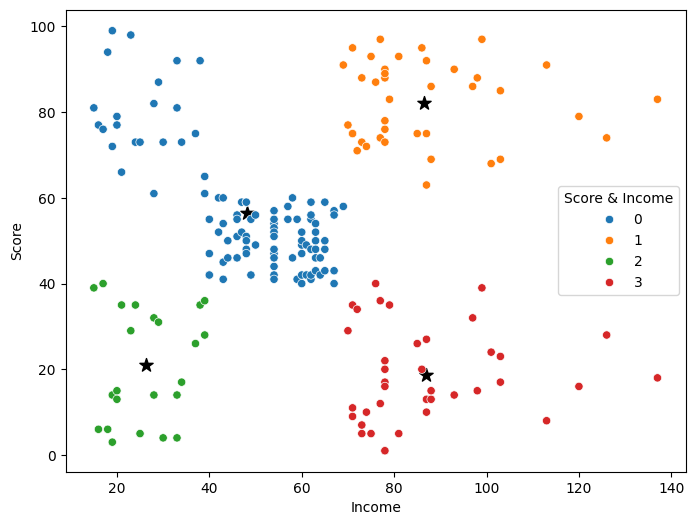

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(df,x='Income',y= 'Score',hue='Score & Income',palette='tab10')
plt.savefig('Clustering Bivariate.png')

In [51]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       2
1     21      15     81       2
2     20      16      6       0
3     23      16     77       2
4     31      17     40       0
..   ...     ...    ...     ...
195   35     120     79       1
196   45     126     28       3
197   32     126     74       1
198   32     137     18       3
199   30     137     83       1

[200 rows x 4 columns]


In [56]:
print(df)

     CustomerID  Gender  Age  Income  Score  income cluster  Score & Income
0             1    Male   19      15     39               1               2
1             2    Male   21      15     81               1               0
2             3  Female   20      16      6               1               2
3             4  Female   23      16     77               1               0
4             5  Female   31      17     40               1               2
..          ...     ...  ...     ...    ...             ...             ...
195         196  Female   35     120     79               2               1
196         197  Female   45     126     28               2               3
197         198    Male   32     126     74               2               1
198         199    Male   32     137     18               2               3
199         200    Male   30     137     83               2               1

[200 rows x 7 columns]


In [59]:
X.to_csv('Clustering.csv')